In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('./Downloads/TibaBora_healthcare_data.csv')

In [4]:
df.head()

,MalePatients,FemalePatients,ColonCancerPatients,ThroatCancerPatients,SkinCancerPatients,CancerConditions
0,NaN,300.0,26.0,32.0,41.0,Progressing
1,485.0,434.0,2.0,27.0,46.0,Progressing
2,398.0,166.0,11.0,49.0,49.0,Stable
3,320.0,165.0,29.0,37.0,45.0,Stable
4,156.0,286.0,8.0,29.0,NaN,Remission


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MalePatients          9000 non-null   float64
 1   FemalePatients        9000 non-null   float64
 2   ColonCancerPatients   9000 non-null   float64
 3   ThroatCancerPatients  9000 non-null   float64
 4   SkinCancerPatients    9000 non-null   float64
 5   CancerConditions      10000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


CHECK FOR MISSING VALUES

In [7]:
df.isnull()

,MalePatients,FemalePatients,ColonCancerPatients,ThroatCancerPatients,SkinCancerPatients,CancerConditions
0,True,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
9995,True,True,False,False,False,False
9996,False,False,False,False,False,False
9997,False,False,False,False,False,False
9998,False,False,False,False,False,False


In [8]:
df.isnull().sum()

MalePatients            1000
FemalePatients          1000
ColonCancerPatients     1000
ThroatCancerPatients    1000
SkinCancerPatients      1000
CancerConditions           0
dtype: int64

FILL THE MISSING VALUES

In [10]:
df.isnull().value_counts()

MalePatients  FemalePatients  ColonCancerPatients  ThroatCancerPatients  SkinCancerPatients  CancerConditions
False         False           False                False                 False               False               5924
                                                   True                  False               False                672
              True            False                False                 False               False                666
              False           True                 False                 False               False                645
                              False                False                 True                False                641
True          False           False                False                 False               False                640
                              True                 False                 False               False                 85
False         False           False                True         

In [11]:
df = df.fillna({
    'MalePatients': df['MalePatients'].mean(),  
    'FemalePatients': df['FemalePatients'].median(),
    'ColonCancerPatients':df['ColonCancerPatients'].ffill(),
    'ThroatCancerPatients': df['ThroatCancerPatients'].bfill(),
    'SkinCancerPatients': df['SkinCancerPatients'].mode()                                                         
                                                          
                                                            
})
#method = 'ffill'method = 'ffill
#method = 'bfill'

In [12]:
df.drop_duplicates()

,MalePatients,FemalePatients,ColonCancerPatients,ThroatCancerPatients,SkinCancerPatients,CancerConditions
0,275.151111,300.0,26.0,32.0,41.0,Progressing
1,485.000000,434.0,2.0,27.0,46.0,Progressing
2,398.000000,166.0,11.0,49.0,49.0,Stable
3,320.000000,165.0,29.0,37.0,45.0,Stable
4,156.000000,286.0,8.0,29.0,NaN,Remission
...,...,...,...,...,...,...
9995,275.151111,276.0,22.0,2.0,14.0,Remission
9996,261.000000,124.0,7.0,11.0,30.0,Progressing
9997,114.000000,261.0,35.0,22.0,35.0,Stable
9998,498.000000,228.0,19.0,46.0,25.0,Progressing


In [13]:
df.head(30)

,MalePatients,FemalePatients,ColonCancerPatients,ThroatCancerPatients,SkinCancerPatients,CancerConditions
0,275.151111,300.0,26.0,32.0,41.0,Progressing
1,485.000000,434.0,2.0,27.0,46.0,Progressing
2,398.000000,166.0,11.0,49.0,49.0,Stable
3,320.000000,165.0,29.0,37.0,45.0,Stable
4,156.000000,286.0,8.0,29.0,NaN,Remission
5,121.000000,154.0,36.0,45.0,5.0,Progressing
6,238.000000,308.0,0.0,42.0,45.0,Remission
7,70.000000,95.0,41.0,16.0,NaN,Remission
8,152.000000,360.0,48.0,8.0,33.0,Stable
9,171.000000,380.0,3.0,27.0,36.0,Stable


CREATE VISUALIZATIONS

1. HISTOGRAM

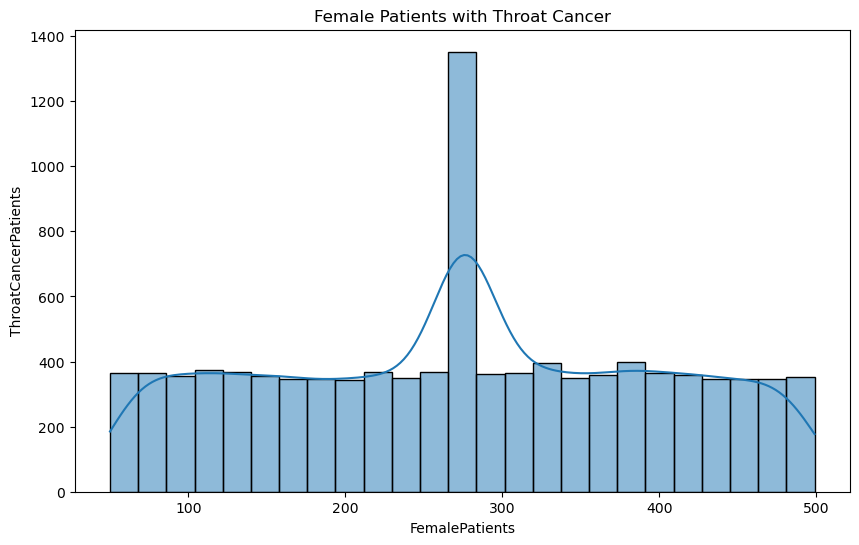

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['FemalePatients'], kde=True)
plt.title('Female Patients with Throat Cancer')
plt.xlabel('FemalePatients')
plt.ylabel('ThroatCancerPatients')
plt.show()

2. BAR GRAPH

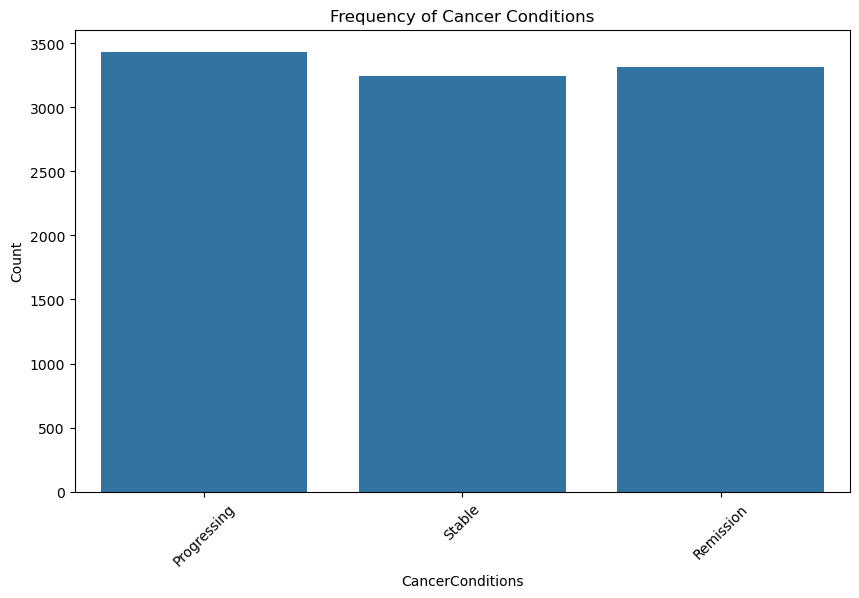

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='CancerConditions', data=df)
plt.title('Frequency of Cancer Conditions')
plt.xlabel('CancerConditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


3. BOX PLOT

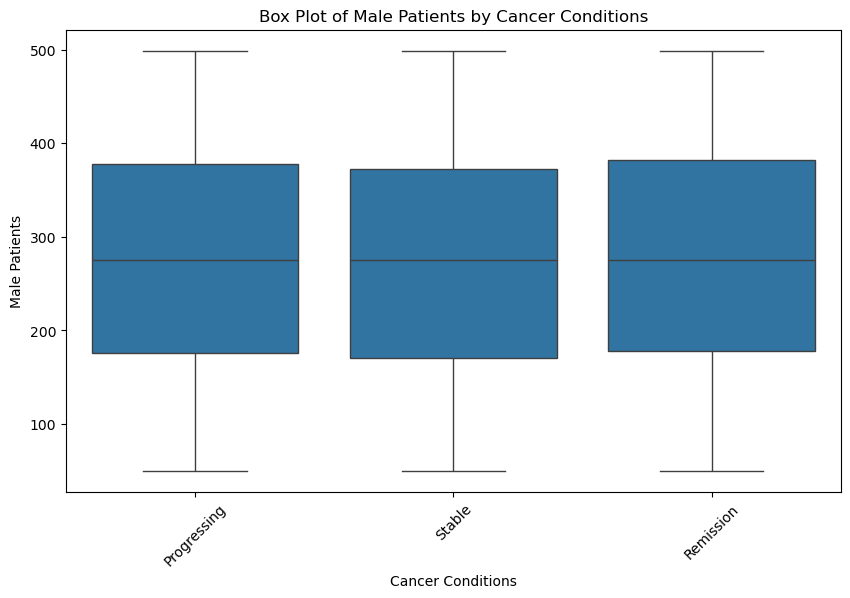

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CancerConditions', y='MalePatients', data=df)
plt.title('Box Plot of Male Patients by Cancer Conditions')
plt.xlabel('Cancer Conditions')
plt.ylabel('Male Patients')
plt.xticks(rotation=45)
plt.show()


4. SCATTER PLOT

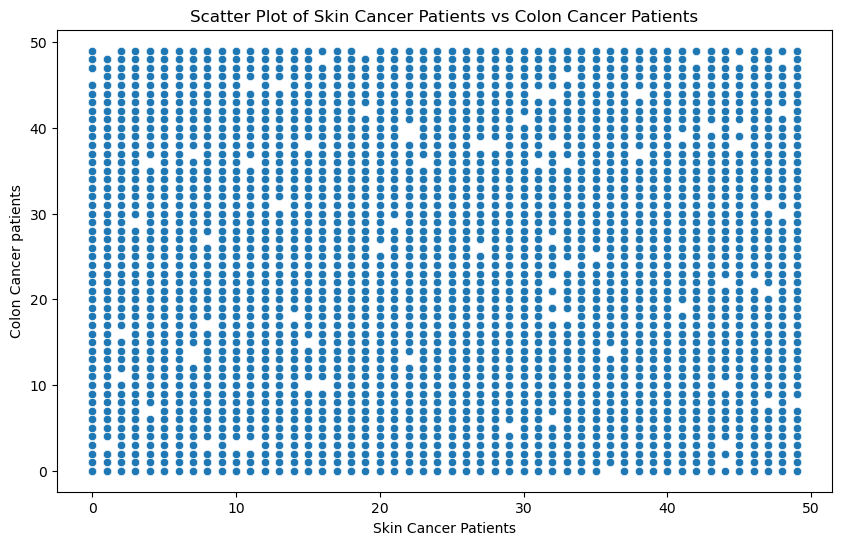

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SkinCancerPatients', y='ColonCancerPatients', data=df)
plt.title('Scatter Plot of Skin Cancer Patients vs Colon Cancer Patients')
plt.xlabel('Skin Cancer Patients')
plt.ylabel('Colon Cancer patients')
plt.show()


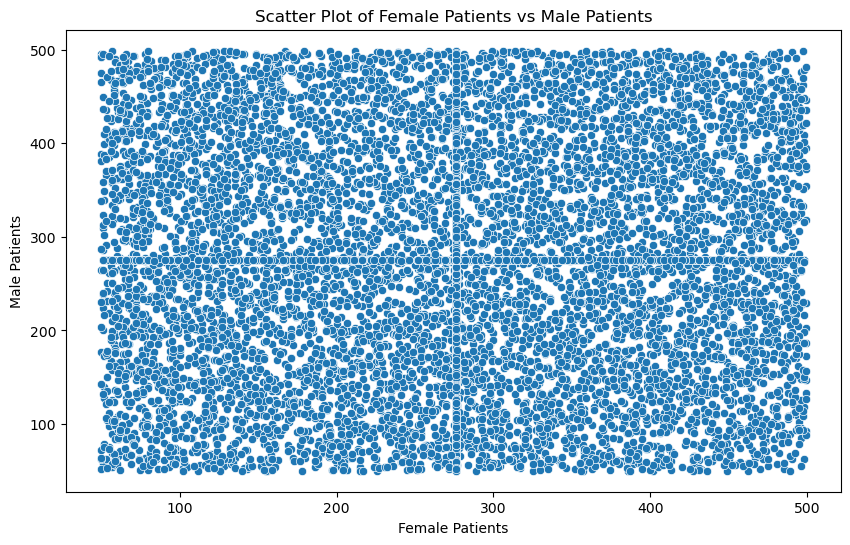

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FemalePatients', y='MalePatients', data=df)
plt.title('Scatter Plot of Female Patients vs Male Patients')
plt.xlabel('Female Patients')
plt.ylabel('Male Patients')
plt.show()
#MalePatients	FemalePatients

5. HEATMAP

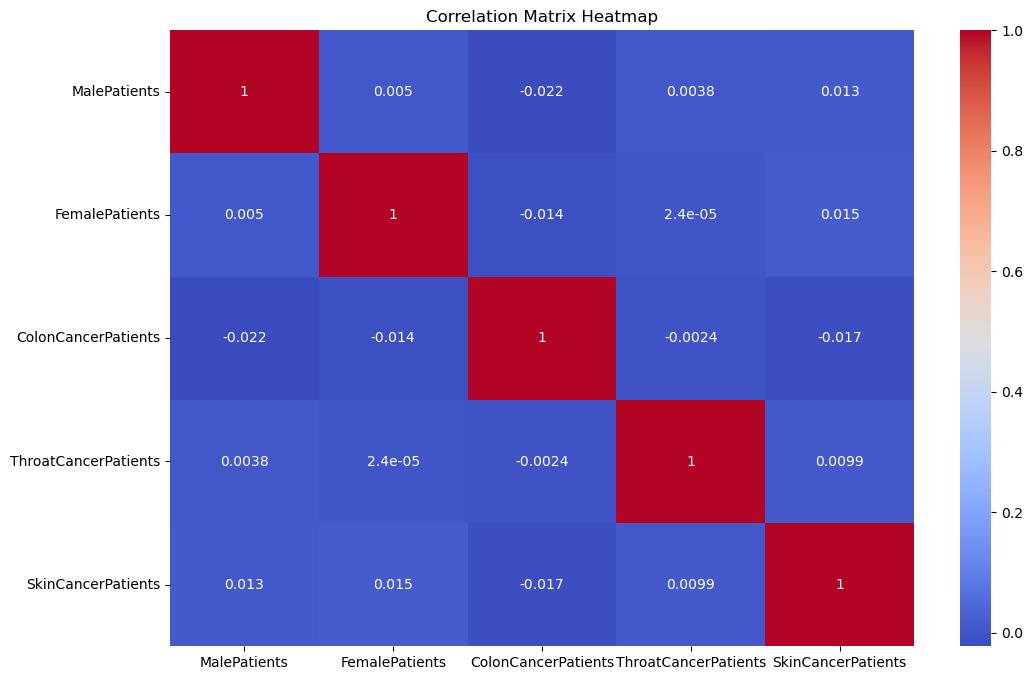

In [24]:
dataset=df.loc[:, ['MalePatients','FemalePatients', 'ColonCancerPatients', 'ThroatCancerPatients', 'SkinCancerPatients']]
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
